# EC1B1 Group project


In [1]:
# Downloading the data

import requests
import pandas as pd
from io import StringIO

# Google Sheets details
SHEET_ID = "1VnzB2MO5jEBzXqtkA0i_oNtONzOIg9y3I5nU1fB6DwU"
# List of sheets and their GIDs 
SHEET_GIDS = {
    "Sheet1": "0",  
    "Sheet2": "1811506178",
    "Sheet3": "1443003215",
    "Sheet4" : "746766865",
    "Sheet5" : "791351243",
    "Sheet6" : "68385636"
    
}

dfs = {}

# Loop through each sheet and fetch data
for sheet_name, gid in SHEET_GIDS.items():
    url = f"https://docs.google.com/spreadsheets/d/{SHEET_ID}/export?format=csv&gid={gid}"
    response = requests.get(url)

    if response.status_code == 200: # test if data fetched properly
        df = pd.read_csv(StringIO(response.text))  # Convert CSV text to DataFrame
        dfs[sheet_name] = df
        print(f"Extracted: {sheet_name} ✅")
    else:
        print(f"Failed to extract {sheet_name}, Status Code: {response.status_code}")

germany_data=dfs["Sheet5"]
us_data=dfs["Sheet6"]
data=dfs['Sheet4']


Extracted: Sheet1 ✅
Extracted: Sheet2 ✅
Extracted: Sheet3 ✅
Extracted: Sheet4 ✅
Extracted: Sheet5 ✅
Extracted: Sheet6 ✅


In [2]:

# df = us_data.drop(columns='USA')

# df.loc[-1] = df.columns  # Insert the column names as a row at index -1
# df.index = df.index + 1  # Shift index to start from 1 to maintain the order
# df = df.sort_index()  # Sort the DataFrame by index
# df.columns = range(df.shape[1])
# newdf = df.T
# # df.columns = df.iloc[0]

# newdf.columns = newdf.iloc[0]

# newdf = newdf.drop(0)

# newdf["Country"] = "USA"

# us_df = newdf

In [3]:
# process the us data
us_data.drop(us_data.columns[0], axis=1)
df5=us_data
df5.loc[-1] = df5.columns  # Insert the column names as a row at index -1
df5.index = df5.index + 1  # Shift index to start from 1 to maintain the order
df5 = df5.sort_index()  # Sort the DataFrame by index
df5.columns = range(df5.shape[1])
newdf5 = df5.T

newdf5 = newdf5.drop([0,1])

newdf5.columns = newdf5.iloc[0]

newdf5.columns = [ 'Date', 'Reserves', 'CPI']

In [4]:
us_df = newdf5.reset_index(drop=True) #reset index and assign it to the dataframe

In [5]:
# processing germany data
germany_data.drop(germany_data.columns[0], axis=1)
df4=germany_data
df4.loc[-1] = df4.columns  # Insert the column names as a row at index -1
df4.index = df4.index + 1  # Shift index to start from 1 to maintain the order
df4 = df4.sort_index()  # Sort the DataFrame by index
df4.columns = range(df4.shape[1])
newdf4 = df4.T

newdf4 = newdf4.drop([0,1])

newdf4.columns = newdf4.iloc[0]

newdf4.columns = [ 'Date', 'Industrial Production', 'Exchange Rate', 'Reserves', 'CPI']


In [6]:
germany_df = newdf4.reset_index(drop=True) #reset index of the df and assign it to a new name

In [7]:
germany_df = germany_df.applymap(lambda x: str(x).replace('Â', '') if isinstance(x, str) else x) # remove any characters which are not numeric or decimal from germany df
us_df = us_df.applymap(lambda x: str(x).replace('Â', '') if isinstance(x, str) else x) # remove any characters which are not numeric or decimal from us df


/tmp/ipykernel_534/1664319036.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  germany_df = germany_df.applymap(lambda x: str(x).replace('Â', '') if isinstance(x, str) else x) # remove any characters which are not numeric or decimal from germany df
/tmp/ipykernel_534/1664319036.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  us_df = us_df.applymap(lambda x: str(x).replace('Â', '') if isinstance(x, str) else x) # remove any characters which are not numeric or decimal from us df


In [8]:
# processing germany data

def convert_to_int(value):
    if isinstance(value, str) and 'M' in value:
        value = value.replace(',', '')  # Remove commas
        return int(float(value.replace('M', '').strip()) * 1_000_000)
    return value  # Return as is if not in expected format

# Apply the function
germany_df['Reserves'] = germany_df['Reserves'].apply(convert_to_int)

us_df['Reserves'] = us_df['Reserves'].apply(convert_to_int)

data has been processed into us_df anf germany_df with the cleaned data

In [9]:
# save data to csv files 
germany_df.to_csv('germany_clean_data.csv', index=False) 
us_df.to_csv('us_clean_data.csv', index=False)

In [10]:
germany_df = germany_df.reset_index(drop=True)  # Ensures a proper integer index

germany_df['Exchange Rate'] = germany_df['Exchange Rate'].str.replace(',', '').astype(float) # save exchange rate data as a float not a string


In [11]:
# CREATE EXCHANGE RATE GROWTH COLUMN

# Initialize a new column with null values
germany_df['Exchange Rate Growth'] = None

# Iteratively calculate and insert exchange rate growth
for i in range(1, len(germany_df)):  # Start from 1 because there's no previous value for the first row
    germany_df.loc[i, 'Exchange Rate Growth'] = ((germany_df.loc[i, 'Exchange Rate'] - germany_df.loc[i-1, 'Exchange Rate']) 
                                         / germany_df.loc[i-1, 'Exchange Rate']) * 100

# Display the updated DataFrame
germany_df

,Date,Industrial Production,Exchange Rate,Reserves,CPI,Exchange Rate Growth
0,Dec 1959,32.5,4.20,4811470000,24.62,None
1,Jan 1960,31.19,4.20,4724160000,24.62,0.0
2,Feb 1960,31.04,4.20,4806360000,24.48,0.0
3,Mar 1960,32.2,4.20,4966460000,24.48,0.0
4,Apr 1960,34.29,4.20,5236120000,24.62,0.0
...,...,...,...,...,...,...
368,Aug 1990,75.96,1.57,72425740000,67.56,-4.268293
369,Sep 1990,86.5,1.57,73197570000,67.77,0.0
370,Oct 1990,92.64,1.52,75011930000,68.26,-3.184713
371,Nov 1990,89.46,1.49,76166070000,68.12,-1.973684


In [12]:
# CODE FOR REAL EXCHANGE RATE AND REAL EXCHANGE RATE GROWTH

# Ensure numeric conversion
germany_df['Exchange Rate'] = pd.to_numeric(germany_df['Exchange Rate'], errors='coerce')
germany_df['CPI'] = pd.to_numeric(germany_df['CPI'], errors='coerce')
us_df['CPI'] = pd.to_numeric(us_df['CPI'], errors='coerce')

# Align US CPI data to the same time period as germany_df 
germany_df['US CPI'] = us_df['CPI'].values  # Ensure correct alignment

# Calculate Real Exchange Rate (RER)
germany_df['Real Exchange Rate'] = germany_df['Exchange Rate'] * (germany_df['US CPI'] / germany_df['CPI'])

# Compute Monthly Growth in Real Exchange Rate
germany_df['Real Exchange Rate Growth'] = germany_df['Real Exchange Rate'].pct_change() * 100

# Display the updated DataFrame
germany_df

,Date,Industrial Production,Exchange Rate,Reserves,CPI,Exchange Rate Growth,US CPI,Real Exchange Rate,Real Exchange Rate Growth
0,Dec 1959,32.5,4.20,4811470000,24.62,None,13.48,2.299594,NaN
1,Jan 1960,31.19,4.20,4724160000,24.62,0.0,13.44,2.292770,-0.296736
2,Feb 1960,31.04,4.20,4806360000,24.48,0.0,13.48,2.312745,0.871217
3,Mar 1960,32.2,4.20,4966460000,24.48,0.0,13.48,2.312745,0.000000
4,Apr 1960,34.29,4.20,5236120000,24.62,0.0,13.53,2.308123,-0.199833
...,...,...,...,...,...,...,...,...,...
368,Aug 1990,75.96,1.57,72425740000,67.56,-4.268293,60.35,1.402450,-3.688121
369,Sep 1990,86.5,1.57,73197570000,67.77,0.0,60.86,1.409919,0.532580
370,Oct 1990,92.64,1.52,75011930000,68.26,-3.184713,61.22,1.363235,-3.311123
371,Nov 1990,89.46,1.49,76166070000,68.12,-1.973684,61.36,1.342137,-1.547590


In [13]:
# CODE FOR REAL EXCHANGE RATE INDEX

dec_1990_rer = germany_df.loc[germany_df['Date'] == 'Dec 1990', 'Real Exchange Rate'].values[0]

germany_df['Real Exchange Rate Index'] = germany_df['Real Exchange Rate'] / dec_1990_rer

# Display the updated DataFrame
germany_df

,Date,Industrial Production,Exchange Rate,Reserves,CPI,Exchange Rate Growth,US CPI,Real Exchange Rate,Real Exchange Rate Growth,Real Exchange Rate Index
0,Dec 1959,32.5,4.20,4811470000,24.62,None,13.48,2.299594,NaN,1.715142
1,Jan 1960,31.19,4.20,4724160000,24.62,0.0,13.44,2.292770,-0.296736,1.710053
2,Feb 1960,31.04,4.20,4806360000,24.48,0.0,13.48,2.312745,0.871217,1.724951
3,Mar 1960,32.2,4.20,4966460000,24.48,0.0,13.48,2.312745,0.000000,1.724951
4,Apr 1960,34.29,4.20,5236120000,24.62,0.0,13.53,2.308123,-0.199833,1.721504
...,...,...,...,...,...,...,...,...,...,...
368,Aug 1990,75.96,1.57,72425740000,67.56,-4.268293,60.35,1.402450,-3.688121,1.046011
369,Sep 1990,86.5,1.57,73197570000,67.77,0.0,60.86,1.409919,0.532580,1.051582
370,Oct 1990,92.64,1.52,75011930000,68.26,-3.184713,61.22,1.363235,-3.311123,1.016763
371,Nov 1990,89.46,1.49,76166070000,68.12,-1.973684,61.36,1.342137,-1.547590,1.001028


In [14]:
# CODE FOR INFLATION

# Calculate monthly inflation rate
germany_df['Monthly Inflation Rate'] = germany_df['CPI'].pct_change() * 100

# Display the updated DataFrame
germany_df

,Date,Industrial Production,Exchange Rate,Reserves,CPI,Exchange Rate Growth,US CPI,Real Exchange Rate,Real Exchange Rate Growth,Real Exchange Rate Index,Monthly Inflation Rate
0,Dec 1959,32.5,4.20,4811470000,24.62,None,13.48,2.299594,NaN,1.715142,NaN
1,Jan 1960,31.19,4.20,4724160000,24.62,0.0,13.44,2.292770,-0.296736,1.710053,0.000000
2,Feb 1960,31.04,4.20,4806360000,24.48,0.0,13.48,2.312745,0.871217,1.724951,-0.568643
3,Mar 1960,32.2,4.20,4966460000,24.48,0.0,13.48,2.312745,0.000000,1.724951,0.000000
4,Apr 1960,34.29,4.20,5236120000,24.62,0.0,13.53,2.308123,-0.199833,1.721504,0.571895
...,...,...,...,...,...,...,...,...,...,...,...
368,Aug 1990,75.96,1.57,72425740000,67.56,-4.268293,60.35,1.402450,-3.688121,1.046011,0.311804
369,Sep 1990,86.5,1.57,73197570000,67.77,0.0,60.86,1.409919,0.532580,1.051582,0.310835
370,Oct 1990,92.64,1.52,75011930000,68.26,-3.184713,61.22,1.363235,-3.311123,1.016763,0.723034
371,Nov 1990,89.46,1.49,76166070000,68.12,-1.973684,61.36,1.342137,-1.547590,1.001028,-0.205098


In [15]:
#CODE FOR INDUSTRIAL PRODUCTION GROWTH

# Ensure Industrial Production values are numeric
germany_df['Industrial Production'] = pd.to_numeric(germany_df['Industrial Production'], errors='coerce')

# Calculate monthly growth rate in industrial production
germany_df['Monthly Industrial Production Growth'] = germany_df['Industrial Production'].pct_change() * 100

# Display the updated DataFrame
germany_df


,Date,Industrial Production,Exchange Rate,Reserves,CPI,Exchange Rate Growth,US CPI,Real Exchange Rate,Real Exchange Rate Growth,Real Exchange Rate Index,Monthly Inflation Rate,Monthly Industrial Production Growth
0,Dec 1959,32.50,4.20,4811470000,24.62,None,13.48,2.299594,NaN,1.715142,NaN,NaN
1,Jan 1960,31.19,4.20,4724160000,24.62,0.0,13.44,2.292770,-0.296736,1.710053,0.000000,-4.030769
2,Feb 1960,31.04,4.20,4806360000,24.48,0.0,13.48,2.312745,0.871217,1.724951,-0.568643,-0.480923
3,Mar 1960,32.20,4.20,4966460000,24.48,0.0,13.48,2.312745,0.000000,1.724951,0.000000,3.737113
4,Apr 1960,34.29,4.20,5236120000,24.62,0.0,13.53,2.308123,-0.199833,1.721504,0.571895,6.490683
...,...,...,...,...,...,...,...,...,...,...,...,...
368,Aug 1990,75.96,1.57,72425740000,67.56,-4.268293,60.35,1.402450,-3.688121,1.046011,0.311804,-3.591826
369,Sep 1990,86.50,1.57,73197570000,67.77,0.0,60.86,1.409919,0.532580,1.051582,0.310835,13.875724
370,Oct 1990,92.64,1.52,75011930000,68.26,-3.184713,61.22,1.363235,-3.311123,1.016763,0.723034,7.098266
371,Nov 1990,89.46,1.49,76166070000,68.12,-1.973684,61.36,1.342137,-1.547590,1.001028,-0.205098,-3.432642


In [16]:
#The growth in industrial production versus 12 months ago 
new_germany_df = germany_df.copy() #creates a deep copy of the dataframe so changes don't affect the original frame

# Convert 'Date' to datetime format (using the 'Dec 1959' format)
new_germany_df['Date'] = pd.to_datetime(new_germany_df['Date'], format='%b %Y')

# Set the Date column as the index
new_germany_df.set_index('Date', inplace=True)

# Calculate the growth in industrial production versus 12 months ago
new_germany_df['Growth in Industrial Production'] = new_germany_df['Industrial Production'].pct_change(periods=12) * 100

# Display the updated DataFrame
new_germany_df

,Industrial Production,Exchange Rate,Reserves,CPI,Exchange Rate Growth,US CPI,Real Exchange Rate,Real Exchange Rate Growth,Real Exchange Rate Index,Monthly Inflation Rate,Monthly Industrial Production Growth,Growth in Industrial Production
Date,,,,,,,,,,,,
1959-12-01,32.50,4.20,4811470000,24.62,None,13.48,2.299594,NaN,1.715142,NaN,NaN,NaN
1960-01-01,31.19,4.20,4724160000,24.62,0.0,13.44,2.292770,-0.296736,1.710053,0.000000,-4.030769,NaN
1960-02-01,31.04,4.20,4806360000,24.48,0.0,13.48,2.312745,0.871217,1.724951,-0.568643,-0.480923,NaN
1960-03-01,32.20,4.20,4966460000,24.48,0.0,13.48,2.312745,0.000000,1.724951,0.000000,3.737113,NaN
1960-04-01,34.29,4.20,5236120000,24.62,0.0,13.53,2.308123,-0.199833,1.721504,0.571895,6.490683,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1990-08-01,75.96,1.57,72425740000,67.56,-4.268293,60.35,1.402450,-3.688121,1.046011,0.311804,-3.591826,6.015352
1990-09-01,86.50,1.57,73197570000,67.77,0.0,60.86,1.409919,0.532580,1.051582,0.310835,13.875724,5.513540
1990-10-01,92.64,1.52,75011930000,68.26,-3.184713,61.22,1.363235,-3.311123,1.016763,0.723034,7.098266,6.153317


In [17]:
# add calculated values to main df
new_germany_df.reset_index(drop=True, inplace=True)
germany_df["Growth in Industrial Production"] = new_germany_df['Growth in Industrial Production']


germany_df

,Date,Industrial Production,Exchange Rate,Reserves,CPI,Exchange Rate Growth,US CPI,Real Exchange Rate,Real Exchange Rate Growth,Real Exchange Rate Index,Monthly Inflation Rate,Monthly Industrial Production Growth,Growth in Industrial Production
0,Dec 1959,32.50,4.20,4811470000,24.62,None,13.48,2.299594,NaN,1.715142,NaN,NaN,NaN
1,Jan 1960,31.19,4.20,4724160000,24.62,0.0,13.44,2.292770,-0.296736,1.710053,0.000000,-4.030769,NaN
2,Feb 1960,31.04,4.20,4806360000,24.48,0.0,13.48,2.312745,0.871217,1.724951,-0.568643,-0.480923,NaN
3,Mar 1960,32.20,4.20,4966460000,24.48,0.0,13.48,2.312745,0.000000,1.724951,0.000000,3.737113,NaN
4,Apr 1960,34.29,4.20,5236120000,24.62,0.0,13.53,2.308123,-0.199833,1.721504,0.571895,6.490683,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Aug 1990,75.96,1.57,72425740000,67.56,-4.268293,60.35,1.402450,-3.688121,1.046011,0.311804,-3.591826,6.015352
369,Sep 1990,86.50,1.57,73197570000,67.77,0.0,60.86,1.409919,0.532580,1.051582,0.310835,13.875724,5.513540
370,Oct 1990,92.64,1.52,75011930000,68.26,-3.184713,61.22,1.363235,-3.311123,1.016763,0.723034,7.098266,6.153317
371,Nov 1990,89.46,1.49,76166070000,68.12,-1.973684,61.36,1.342137,-1.547590,1.001028,-0.205098,-3.432642,5.582438


In [18]:
# RESERVES INDEX

# Extract the value in the 'Reserves' column for that row
dec_1959_row = germany_df[germany_df['Date'] == 'Dec 1959']
# Assuming 'Reserves' is the column name
base_value = dec_1959_row['Reserves'].iloc[0]
germany_df['Reserves Index'] = (germany_df['Reserves'] / base_value) * 100

germany_df


,Date,Industrial Production,Exchange Rate,Reserves,CPI,Exchange Rate Growth,US CPI,Real Exchange Rate,Real Exchange Rate Growth,Real Exchange Rate Index,Monthly Inflation Rate,Monthly Industrial Production Growth,Growth in Industrial Production,Reserves Index
0,Dec 1959,32.50,4.20,4811470000,24.62,None,13.48,2.299594,NaN,1.715142,NaN,NaN,NaN,100.000000
1,Jan 1960,31.19,4.20,4724160000,24.62,0.0,13.44,2.292770,-0.296736,1.710053,0.000000,-4.030769,NaN,98.185378
2,Feb 1960,31.04,4.20,4806360000,24.48,0.0,13.48,2.312745,0.871217,1.724951,-0.568643,-0.480923,NaN,99.893795
3,Mar 1960,32.20,4.20,4966460000,24.48,0.0,13.48,2.312745,0.000000,1.724951,0.000000,3.737113,NaN,103.221261
4,Apr 1960,34.29,4.20,5236120000,24.62,0.0,13.53,2.308123,-0.199833,1.721504,0.571895,6.490683,NaN,108.825785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Aug 1990,75.96,1.57,72425740000,67.56,-4.268293,60.35,1.402450,-3.688121,1.046011,0.311804,-3.591826,6.015352,1505.272609
369,Sep 1990,86.50,1.57,73197570000,67.77,0.0,60.86,1.409919,0.532580,1.051582,0.310835,13.875724,5.513540,1521.314068
370,Oct 1990,92.64,1.52,75011930000,68.26,-3.184713,61.22,1.363235,-3.311123,1.016763,0.723034,7.098266,6.153317,1559.023126
371,Nov 1990,89.46,1.49,76166070000,68.12,-1.973684,61.36,1.342137,-1.547590,1.001028,-0.205098,-3.432642,5.582438,1583.010390


In [19]:
# US INFLATION

# Calculate monthly inflation rate
us_df['Monthly Inflation Rate'] = us_df['CPI'].pct_change() * 100

# Display the updated DataFrame
us_df

,Date,Reserves,CPI,Monthly Inflation Rate
0,Dec 1959,21504500000,13.48,NaN
1,Jan 1960,21478100000,13.44,-0.296736
2,Feb 1960,21395700000,13.48,0.297619
3,Mar 1960,21344700000,13.48,0.000000
4,Apr 1960,21278000000,13.53,0.370920
...,...,...,...,...
368,Aug 1990,78908840000,60.35,0.919732
369,Sep 1990,80024170000,60.86,0.845070
370,Oct 1990,82852200000,61.22,0.591522
371,Nov 1990,83059400000,61.36,0.228683


In [20]:
# US RESERVES INDEX

# Extract the value in the 'Reserves' column for that row
us_dec_1959_row = us_df[us_df['Date'] == 'Dec 1959']
# Assuming 'International Reserves' is the column name
base_value = us_dec_1959_row['Reserves'].iloc[0]
us_df['Reserves Index'] = (us_df['Reserves'] / base_value) * 100

us_df

,Date,Reserves,CPI,Monthly Inflation Rate,Reserves Index
0,Dec 1959,21504500000,13.48,NaN,100.000000
1,Jan 1960,21478100000,13.44,-0.296736,99.877235
2,Feb 1960,21395700000,13.48,0.297619,99.494059
3,Mar 1960,21344700000,13.48,0.000000,99.256900
4,Apr 1960,21278000000,13.53,0.370920,98.946732
...,...,...,...,...,...
368,Aug 1990,78908840000,60.35,0.919732,366.941059
369,Sep 1990,80024170000,60.86,0.845070,372.127555
370,Oct 1990,82852200000,61.22,0.591522,385.278430
371,Nov 1990,83059400000,61.36,0.228683,386.241949


In [21]:
# REFORMAT DATE TIME

germany_df['Date'] = pd.to_datetime(germany_df['Date'], format='%b %Y')
us_df['Date'] = pd.to_datetime(us_df['Date'], format='%b %Y')

In [22]:
# creating a combined df

germany_df_half = germany_df
germany_df_half["Country"] = "Germany"

us_df_half = us_df
us_df_half["Country"] = "USA"

combined_df = pd.concat([germany_df_half, us_df_half], axis=0, ignore_index=True)

combined_df

,Date,Industrial Production,Exchange Rate,Reserves,CPI,Exchange Rate Growth,US CPI,Real Exchange Rate,Real Exchange Rate Growth,Real Exchange Rate Index,Monthly Inflation Rate,Monthly Industrial Production Growth,Growth in Industrial Production,Reserves Index,Country
0,1959-12-01,32.50,4.2,4811470000,24.62,None,13.48,2.299594,NaN,1.715142,NaN,NaN,NaN,100.000000,Germany
1,1960-01-01,31.19,4.2,4724160000,24.62,0.0,13.44,2.292770,-0.296736,1.710053,0.000000,-4.030769,NaN,98.185378,Germany
2,1960-02-01,31.04,4.2,4806360000,24.48,0.0,13.48,2.312745,0.871217,1.724951,-0.568643,-0.480923,NaN,99.893795,Germany
3,1960-03-01,32.20,4.2,4966460000,24.48,0.0,13.48,2.312745,0.000000,1.724951,0.000000,3.737113,NaN,103.221261,Germany
4,1960-04-01,34.29,4.2,5236120000,24.62,0.0,13.53,2.308123,-0.199833,1.721504,0.571895,6.490683,NaN,108.825785,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,1990-08-01,NaN,NaN,78908840000,60.35,NaN,NaN,NaN,NaN,NaN,0.919732,NaN,NaN,366.941059,USA
742,1990-09-01,NaN,NaN,80024170000,60.86,NaN,NaN,NaN,NaN,NaN,0.845070,NaN,NaN,372.127555,USA
743,1990-10-01,NaN,NaN,82852200000,61.22,NaN,NaN,NaN,NaN,NaN,0.591522,NaN,NaN,385.278430,USA
744,1990-11-01,NaN,NaN,83059400000,61.36,NaN,NaN,NaN,NaN,NaN,0.228683,NaN,NaN,386.241949,USA


In [23]:
# save final dataframes as csv files
germany_df_half.to_csv('germany_data.csv', index=False)
us_df_half.to_csv('us_data.csv', index=False)
combined_df.to_csv('combined_data.csv', index=False)


## 5.2.1 Exchange Rates and International Reserve Graphs

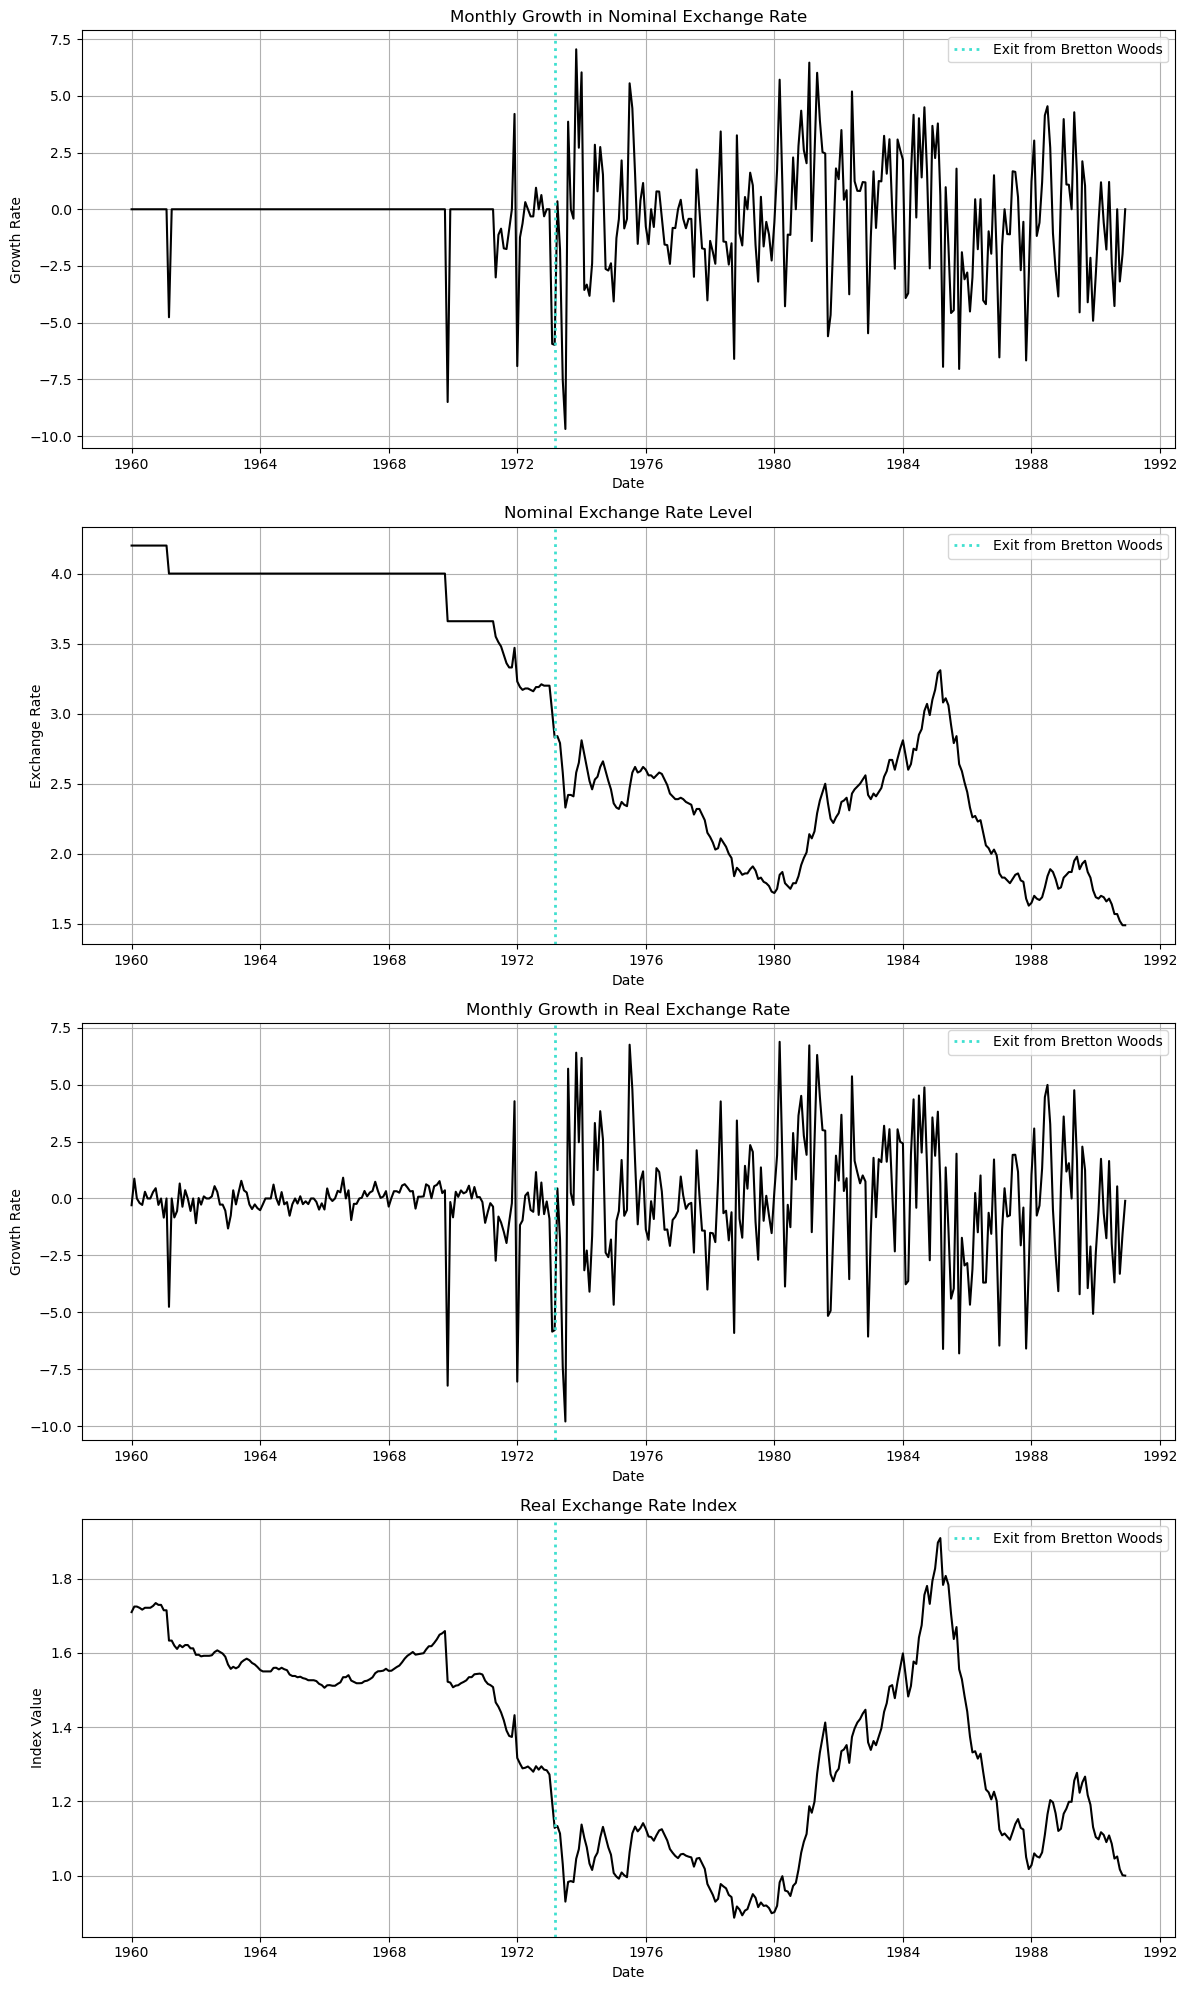

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("combined_data.csv")

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define time range: January 1960 to December 1990
start_date = "1960-01-01"
end_date = "1990-12-31"
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Select Germany 
selected_country = df['Country'].unique()[0]  # Adjust if needed
df_country = df[df['Country'] == selected_country].sort_values('Date')

# Define the date Germany left the Bretton Woods system 
bretton_woods_exit = pd.to_datetime("1973-03-01")  

# Create figure and axes
fig, axes = plt.subplots(4, 1, figsize=(12, 20))

# Line style for plots
line_style = '-'

# Bright contrasting color for Bretton Woods exit line
bretton_line_color = 'turquoise'

# Monthly growth in the nominal exchange rate
axes[0].plot(df_country['Date'], df_country['Exchange Rate Growth'], linestyle=line_style, color='black')
axes[0].axvline(bretton_woods_exit, color=bretton_line_color, linestyle='dotted', linewidth=2, label="Exit from Bretton Woods")
axes[0].set_title("Monthly Growth in Nominal Exchange Rate")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Growth Rate")
axes[0].legend()
axes[0].grid()

# Level of the nominal exchange rate
axes[1].plot(df_country['Date'], df_country['Exchange Rate'], linestyle=line_style, color='black')
axes[1].axvline(bretton_woods_exit, color=bretton_line_color, linestyle='dotted', linewidth=2, label="Exit from Bretton Woods")
axes[1].set_title("Nominal Exchange Rate Level")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Exchange Rate")
axes[1].legend()
axes[1].grid()

# Monthly growth in the real exchange rate
axes[2].plot(df_country['Date'], df_country['Real Exchange Rate Growth'], linestyle=line_style, color='black')
axes[2].axvline(bretton_woods_exit, color=bretton_line_color, linestyle='dotted', linewidth=2, label="Exit from Bretton Woods")
axes[2].set_title("Monthly Growth in Real Exchange Rate")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Growth Rate")
axes[2].legend()
axes[2].grid()

# Real exchange rate index
axes[3].plot(df_country['Date'], df_country['Real Exchange Rate Index'], linestyle=line_style, color='black')
axes[3].axvline(bretton_woods_exit, color=bretton_line_color, linestyle='dotted', linewidth=2, label="Exit from Bretton Woods")
axes[3].set_title("Real Exchange Rate Index")
axes[3].set_xlabel("Date")
axes[3].set_ylabel("Index Value")
axes[3].legend()
axes[3].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


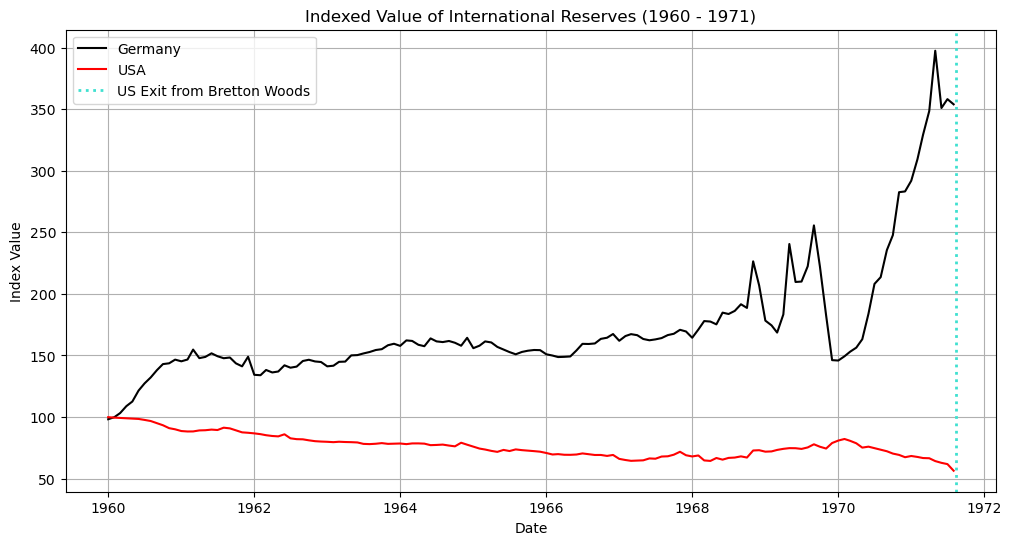

In [25]:
# Load the dataset 
df = pd.read_csv("combined_data.csv")

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define time range: January 1960 until the US exit from Bretton Woods
start_date = "1960-01-01"
us_exit_bretton_woods = pd.to_datetime("1971-08-15")  # Adjust as needed

# Filter reserves data within the time range
df_reserves_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= us_exit_bretton_woods)]

# Select Germany
selected_country = df['Country'].unique()[0]  # Adjust if needed

# Extract reserves data for Germany and US
df_country_reserves = df_reserves_filtered[df_reserves_filtered['Country'] == selected_country][['Date', 'Reserves Index']]
df_us_reserves = df_reserves_filtered[df_reserves_filtered['Country'] == 'USA'][['Date', 'Reserves Index']]

# Create figure and axis
plt.figure(figsize=(12, 6))

# Plot reserves for Germany
plt.plot(df_country_reserves['Date'], df_country_reserves['Reserves Index'], linestyle='-', color='black', label=selected_country)

# Plot reserves for US
plt.plot(df_us_reserves['Date'], df_us_reserves['Reserves Index'], linestyle='-', color='red', label='USA')

# Mark US exit from Bretton Woods
plt.axvline(us_exit_bretton_woods, color='turquoise', linestyle='dotted', linewidth=2, label="US Exit from Bretton Woods")

# Labels and title
plt.title("Indexed Value of International Reserves (1960 - 1971)")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend()
plt.grid()

# Show plot
plt.show()


In [26]:
# Load the dataset
df = pd.read_csv("combined_data.csv")

# Convert Date officially to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define Bretton Woods periods
before_bretton_woods_end = "1971-06-30"
after_bretton_woods_start = "1973-03-01"

# Separate data for Germany and USA
df_germany = df[df['Country'] == 'Germany']
df_us = df[df['Country'] == 'USA']

# Compute Inflation Difference by merging Germany and US data on Date (reconciling stacked table)
df_merged = pd.merge(df_germany[['Date', 'Monthly Inflation Rate']],
                      df_us[['Date', 'Monthly Inflation Rate']],
                      on='Date', suffixes=('_Germany', '_US'))
df_merged['Inflation Difference'] = df_merged['Monthly Inflation Rate_Germany'] - df_merged['Monthly Inflation Rate_US']

# Merge inflation difference back to Germany dataset
df_germany = df_germany.merge(df_merged[['Date', 'Inflation Difference']], on='Date', how='left')

# Filter data before and after Bretton Woods
df_before = df_germany[df_germany['Date'] <= before_bretton_woods_end]
df_after = df_germany[df_germany['Date'] >= after_bretton_woods_start]

# Variables to calculate standard deviation for
variables = [
    "Exchange Rate Growth",  # Monthly growth of nominal exchange rate
    "Real Exchange Rate Growth",  # Monthly growth of real exchange rate
    "Monthly Inflation Rate",  # Inflation rate in Germany
    "Inflation Difference",  # Difference between Germany's inflation and US inflation
    "Growth in Industrial Production"  # 12-monthly industrial production growth
]

# Check no issue with variables existing in the dataset
variables = [var for var in variables if var in df_germany.columns]

# Compute standard deviations
std_before = df_before[variables].std()
std_after = df_after[variables].std()

# Compute ratio of standard deviations (before & after)
std_ratio = std_before / std_after

# Create results table
std_dev_table = pd.DataFrame({
    "Standard Deviation Before Bretton Woods": std_before,
    "Standard Deviation After Bretton Woods": std_after,
    "Ratio (Before / After)": std_ratio
})

# Save standard deviation table to CSV + Display
std_dev_table.to_csv("5.2.3_std_dev_table.csv", index=True)
print(std_dev_table)

                                 Standard Deviation Before Bretton Woods  \
Exchange Rate Growth                                            0.867229   
Real Exchange Rate Growth                                       0.934809   
Monthly Inflation Rate                                          0.341028   
Inflation Difference                                            0.414240   
Growth in Industrial Production                                 5.614914   

                                 Standard Deviation After Bretton Woods  \
Exchange Rate Growth                                           2.884954   
Real Exchange Rate Growth                                      2.944687   
Monthly Inflation Rate                                         0.306578   
Inflation Difference                                           0.366527   
Growth in Industrial Production                                4.686166   

                                 Ratio (Before / After)  
Exchange Rate Growth              

## 5.2.2 Inflation and Industrial Production Graphs
  
Part 1: Data Import and Preprocessing
If you haven’t already loaded and preprocessed the data, run this first. This step ensures we have the correct timeframe (January 1960 to December 1990) and the dataset is properly formatted.

In [27]:
# Load the data
df = pd.read_csv('combined_data.csv')

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the required period
start_date = pd.to_datetime('1960-01-01')
end_date = pd.to_datetime('1990-12-31')
df_full = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Display the first few rows for confirmation
print(df_full.head())


        Date  Industrial Production  Exchange Rate    Reserves    CPI  \
1 1960-01-01                  31.19            4.2  4724160000  24.62   
2 1960-02-01                  31.04            4.2  4806360000  24.48   
3 1960-03-01                  32.20            4.2  4966460000  24.48   
4 1960-04-01                  34.29            4.2  5236120000  24.62   
5 1960-05-01                  33.73            4.2  5417090000  24.69   

   Exchange Rate Growth  US CPI  Real Exchange Rate  \
1                   0.0   13.44            2.292770   
2                   0.0   13.48            2.312745   
3                   0.0   13.48            2.312745   
4                   0.0   13.53            2.308123   
5                   0.0   13.53            2.301580   

   Real Exchange Rate Growth  Real Exchange Rate Index  \
1                  -0.296736                  1.710053   
2                   0.871217                  1.724951   
3                   0.000000                  1.724951  

Part 2: Plotting Inflation Graphs
This section plots:

Monthly inflation in Germany
The difference between monthly inflation in Germany vs. the US